# Problem statement:

### Overview:

Access to clean and safe drinking water is a basic human need, yet millions worldwide do not have access to potable water. Water quality testing is critical to ensuring that water is safe to consume. This study intends to create a machine-learning model that can predict water potability based on several physicochemical parameters of water. The objective is to develop a trustworthy method for swiftly monitoring water quality, which will be especially beneficial in areas with limited water testing resources.

### Objectives:

1. Create a supervised machine learning model using the K-Nearest Neighbors (KNN) classifier to predict water potability.

2. To assess the model's performance using relevant measures like accuracy, precision, recall, and the F1 score.

3. Using the dataset, share insights into the primary elements influencing water potability.

### Goals:

Develop a model that can accurately classify water samples as either potable or non-potable.

Provide a clear understanding of the dataset and the relationships between different water quality parameters.

Offer a foundation for future improvements and applications in water quality assessment.

# Dataset description:

The dataset used in this project contains water quality metrics for various water samples.

Each sample is labeled as either potable (1) or non-potable (0).

The dataset includes the following features:

1. pH: The pH value of the water (a measure of acidity or alkalinity).

2. Hardness: The amount of dissolved calcium and magnesium in the water.

3. Solids: Total dissolved solids (TDS) in the water.

4. Chloramines: The amount of chloramines in the water.

5. Sulfate: The amount of sulfates dissolved in the water.

6. Conductivity: The electrical conductivity of the water.

7. Organic_carbon: The amount of organic carbon in the water.

8. Trihalomethanes: The amount of trihalomethanes in the water.

9. Turbidity: The measure of water clarity.

10. Potability: The target variable indicating whether the water is safe for human consumption (1 = potable, 0 = not potable).

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv ('water_potability.csv')

In [6]:
# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [9]:
# Display summary statistics for numerical features
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# Exploratory data analysis:

In [8]:
# Display basic information about the dataset
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [10]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


Note: The dataset contains missing values in the following columns:
- ph: 491 missing values
- Sulfate: 781 missing values
- Trihalomethanes: 162 missing values

These missing values need to be handled before proceeding with modeling. Common strategies include imputation (e.g., using mean, median, or mode) or advanced techniques like KNN imputation.

In [11]:
# Display the distribution of the target variable (Potability)
print("\nDistribution of Target Variable (Potability):")
print(df['Potability'].value_counts())


Distribution of Target Variable (Potability):
Potability
0    1998
1    1278
Name: count, dtype: int64


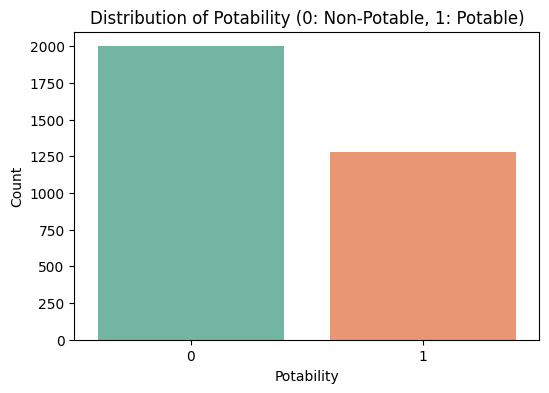

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Potability', data=df, hue='Potability', palette='Set2', legend=False)
plt.title('Distribution of Potability (0: Non-Potable, 1: Potable)')
plt.xlabel('Potability')
plt.ylabel('Count')
plt.show()

The dataset is imbalanced, with more samples labeled as 0 (Non-Potable) than 1 (Potable).

Specifically, about 61% of the samples are non-potable, and 39% are potable.

In [14]:
# Check for duplicate rows
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Number of duplicate rows:
0


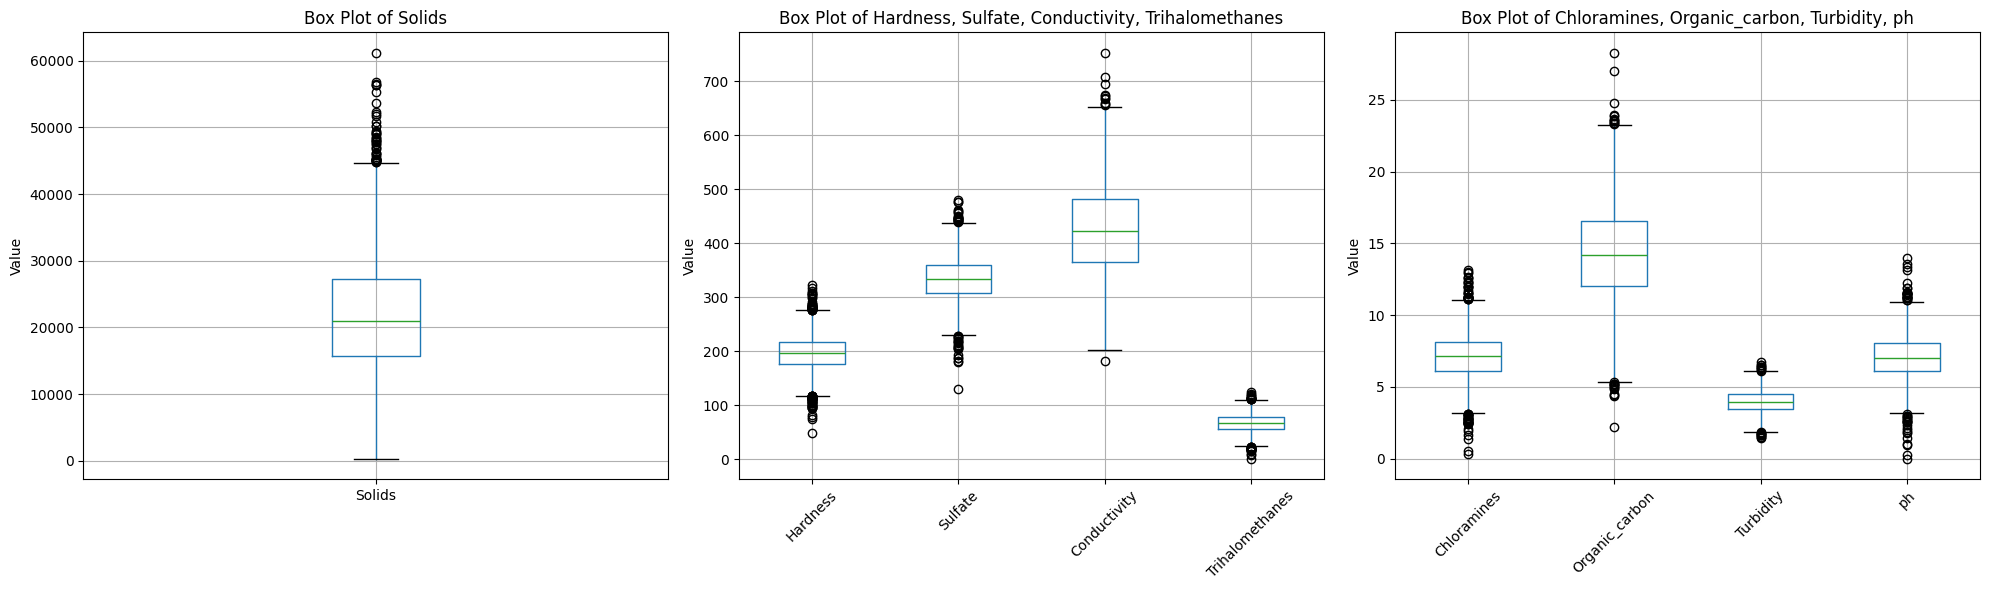

In [7]:
# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot box plot for Solids
df.boxplot(column=['Solids'], ax=axes[0])
axes[0].set_title('Box Plot of Solids')
axes[0].set_ylabel('Value')

# Plot box plot for Hardness, Sulfate, Conductivity, Trihalomethanes
df.boxplot(column=['Hardness', 'Sulfate', 'Conductivity', 'Trihalomethanes'], ax=axes[1])
axes[1].set_title('Box Plot of Hardness, Sulfate, Conductivity, Trihalomethanes')
axes[1].set_ylabel('Value')
axes[1].tick_params(axis='x', rotation=45)

# Plot box plot for Chloramines, Organic_carbon, Turbidity, ph
df.boxplot(column=['Chloramines', 'Organic_carbon', 'Turbidity', 'ph'], ax=axes[2])
axes[2].set_title('Box Plot of Chloramines, Organic_carbon, Turbidity, ph')
axes[2].set_ylabel('Value')
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [8]:
# Function to detect outliers using IQR
def detect_outliers(column):
    Q1 = column.quantile(0.25)  # First quartile (25th percentile)
    Q3 = column.quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1               # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Detect and count outliers for each numerical feature
outliers_summary = {}
for col in ['Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'ph']:
    outliers = detect_outliers(df[col])
    outliers_summary[col] = len(outliers)

# Display the number of outliers for each feature
print("Number of outliers in each column:")
print(outliers_summary)

Number of outliers in each column:
{'Hardness': 83, 'Solids': 47, 'Chloramines': 61, 'Sulfate': 41, 'Conductivity': 11, 'Organic_carbon': 25, 'Trihalomethanes': 33, 'Turbidity': 19, 'ph': 46}


# Data preparation:

### Handle Missing Values:

In [5]:
# Impute missing values with the median (without using inplace=True)
df['ph'] = df['ph'].fillna(df['ph'].median())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].median())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].median())

# Verify that there are no missing values left
print("\nMissing values after imputation:")
print(df.isnull().sum())

# Save the dataset after handling missing values
df.to_csv('dataset_after_missing_values.csv', index=False)
print("\nDataset saved as 'dataset_after_missing_values.csv'")


Missing values after imputation:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Dataset saved as 'dataset_after_missing_values.csv'


### Handle Outliers:

In [6]:
# Load the dataset after handling missing values
df = pd.read_csv('dataset_after_missing_values.csv')

# Function to cap outliers using IQR
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Cap outliers for each column
for col in ['Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'ph']:
    df = cap_outliers(df, col)

# Verify outliers have been handled
print("\nSummary Statistics After Capping Outliers:")
print(df.describe())

# Save the dataset after handling outliers
df.to_csv('dataset_after_outliers.csv', index=False)
print("\nDataset saved as 'dataset_after_outliers.csv'")


Summary Statistics After Capping Outliers:
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.073348   196.392423  21957.112200     7.121794   333.621265   
std       1.382036    32.017189   8592.820397     1.544126    31.769482   
min       3.889107   117.125160    320.942611     3.146221   267.157960   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      10.258615   276.392834  44831.869873    11.096086   400.322434   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.129974       14.283462        66.431612     3.966612     0.390110  
std       80.564144        3.288367  

### Handle Imbalanced Target Variable

We used SMOTE (Synthetic Minority Oversampling Technique) to balance the dataset. SMOTE is a popular oversampling technique that generates synthetic samples for the minority class to balance the class distribution.

![SMOTE](SMOTE.png)

SMOTE analyzes the y values (target labels) and determines which class is the minority class

It then works on the minority class and performs the following steps for each instance in the minority class:
   
Find nearest neighbors: For each minority class sample, SMOTE finds its k nearest neighbors. The default number of neighbors (k) is 5, which can be adjusted.
   
For each sample in the minority class, SMOTE generates synthetic samples by choosing a neighbor and creating a new sample that lies somewhere between the current instance and the neighbor. This is done by taking a weighted average of the features of the original sample and the selected neighbor.

In [7]:
from imblearn.over_sampling import SMOTE

# Load the dataset after handling outliers
df = pd.read_csv('dataset_after_outliers.csv')

# Separate features and target
X = df.drop(columns=['Potability'])
y = df['Potability']

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine resampled features and target into a new DataFrame
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Check the new distribution of the target variable
print("\nResampled Target Variable Distribution:")
print(df_resampled['Potability'].value_counts())

# Save the dataset after handling imbalanced target variable
df_resampled.to_csv('dataset_after_resampling.csv', index=False)
print("\nDataset saved as 'dataset_after_resampling.csv'")


Resampled Target Variable Distribution:
Potability
0    1998
1    1998
Name: count, dtype: int64

Dataset saved as 'dataset_after_resampling.csv'


### Handle Uneven Scales:

In [14]:
from sklearn.preprocessing import StandardScaler

# Load the dataset after resampling
df = pd.read_csv('dataset_after_resampling.csv')

# Separate features and target
X = df.drop(columns=['Potability'])
y = df['Potability']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier handling
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Combine scaled features and target into a new DataFrame
df_scaled = pd.concat([X_scaled, y], axis=1)

# Display the scaled features
print("\nScaled Features:")
display(df_scaled.describe())

# Save the dataset after handling uneven scales
df_scaled.to_csv('dataset_after_scaling.csv', index=False)
print("\nDataset saved as 'dataset_after_scaling.csv'")


Scaled Features:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3.996000e+03,3.996000e+03,3.996000e+03,3.996000e+03,3.996000e+03,3.996000e+03,3.996000e+03,3.996000e+03,3.996000e+03,3996.000000
mean,-4.400884e-16,-6.023432e-16,-2.222669e-17,2.027074e-16,-1.298039e-15,-2.898360e-16,6.379059e-16,1.831479e-16,9.779742e-17,0.500000
std,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,0.500063
min,-2.384943e+00,-2.532192e+00,-2.498719e+00,-2.636174e+00,-2.108430e+00,-2.976273e+00,-2.778656e+00,-2.651146e+00,-2.826521e+00,0.000000
25%,-5.745907e-01,-6.152522e-01,-7.210710e-01,-6.456955e-01,-5.268145e-01,-7.428715e-01,-6.655061e-01,-6.189250e-01,-6.742766e-01,0.000000
50%,-1.593454e-02,1.115632e-02,-1.285940e-01,2.843606e-03,-1.402480e-02,-5.316461e-02,-2.112554e-02,1.357769e-02,-9.489489e-03,0.500000
75%,5.725225e-01,6.377252e-01,6.197688e-01,6.363397e-01,5.344487e-01,6.869389e-01,6.783332e-01,6.499751e-01,6.794688e-01,1.000000
max,2.408933e+00,2.550326e+00,2.630024e+00,2.610517e+00,2.122744e+00,2.926092e+00,2.816243e+00,2.682918e+00,2.822048e+00,1.000000


In [10]:
# Load the dataset after scaling
df_scaled = pd.read_csv('dataset_after_scaling.csv')

# Display the final cleaned dataset
print("\nFinal Cleaned Dataset:")
display(df_scaled.head())

# Save the final cleaned dataset
df_scaled.to_csv('final_cleaned_dataset.csv', index=False)
print("\nFinal cleaned dataset saved as 'final_cleaned_dataset.csv'")


Final Cleaned Dataset:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-0.015935,0.268556,-0.140033,0.105345,1.112139,1.761840,-1.205581,1.370377,-1.342842,0
1,-2.384943,-2.139749,-0.389063,-0.333514,-0.014025,2.125172,0.289171,-0.672094,0.704283,0
2,0.783637,0.885916,-0.241635,1.409234,-0.014025,-0.090660,0.814994,0.000096,-1.219286,0
3,0.947441,0.571174,0.001359,0.606344,0.742598,-0.794264,1.303221,2.259703,0.874860,0
4,1.531072,-0.490592,-0.464082,-0.392018,-0.742852,-0.347430,-0.838607,-2.292852,0.137645,0



Final cleaned dataset saved as 'final_cleaned_dataset.csv'


# Data visualization:


Correlation Heatmap:


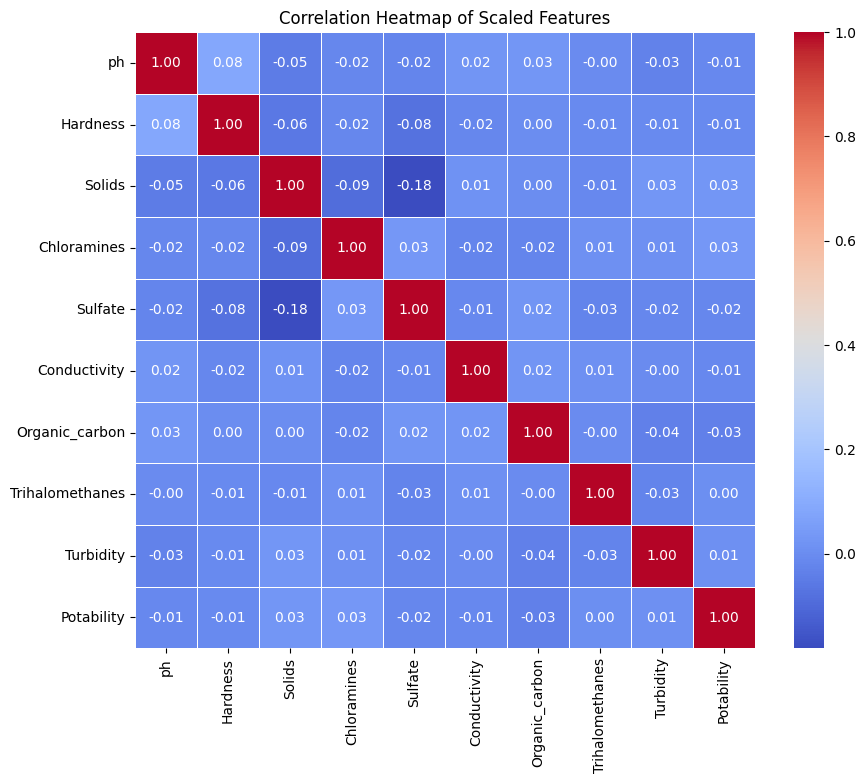


Distribution of Scaled Features:


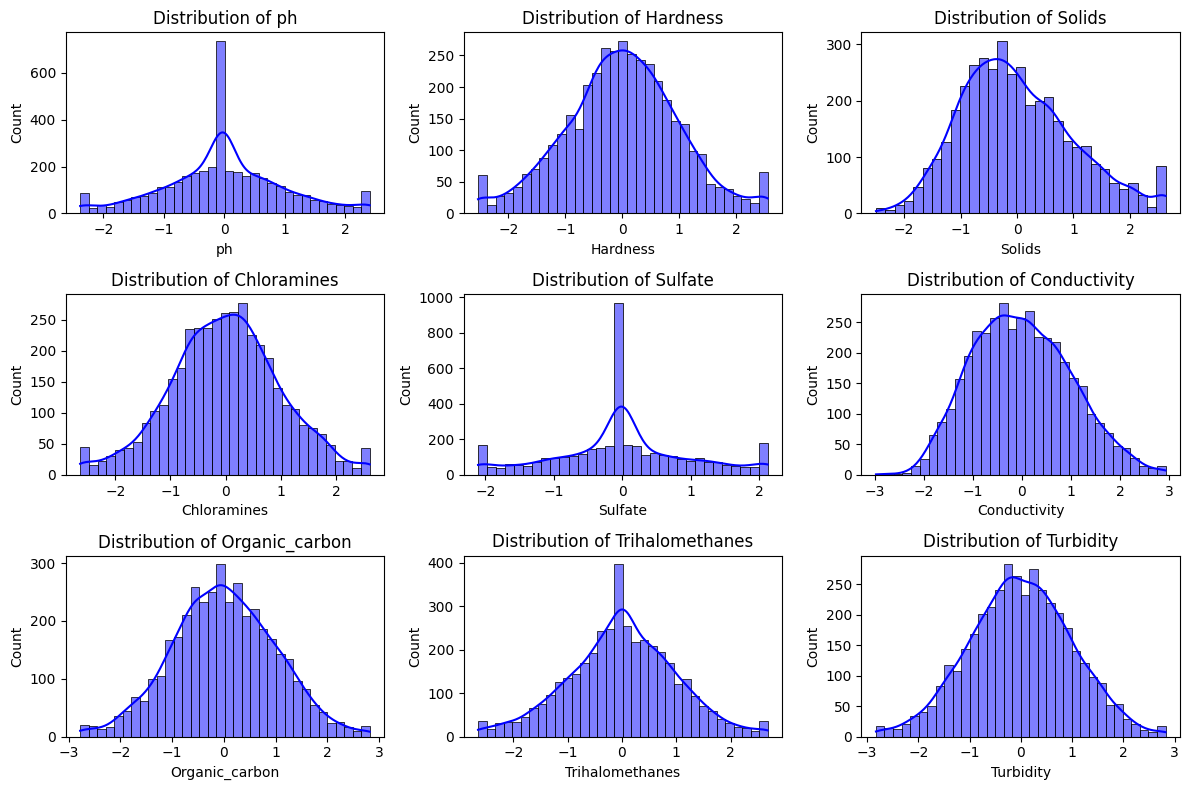


Boxplots of Scaled Features:


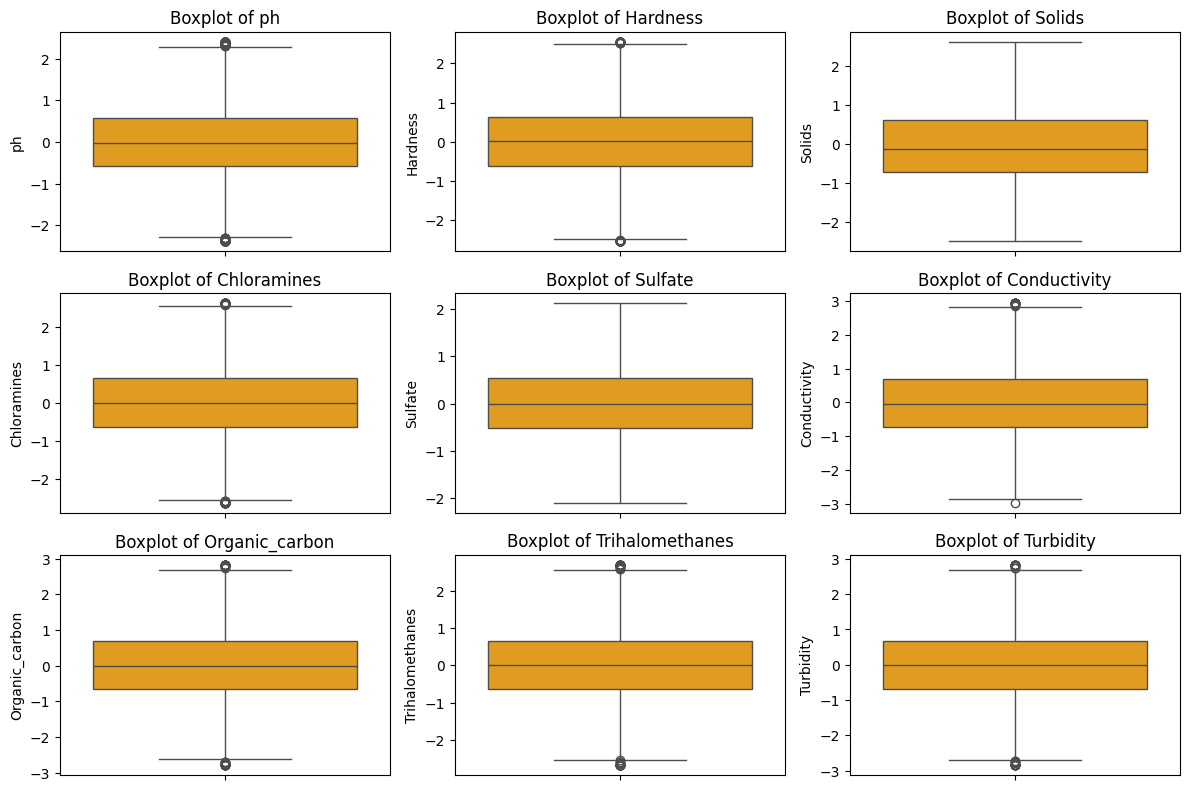

In [15]:
# Load the dataset
df_scaled = pd.read_csv('final_cleaned_dataset.csv')

# Function 2: Correlation Heatmap
def plot_correlation_heatmap(df):
    print("\nCorrelation Heatmap:")
    plt.figure(figsize=(10, 8))
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title("Correlation Heatmap of Scaled Features")
    plt.show()

# Function 3: Distribution Plots
def plot_distributions(df):
    print("\nDistribution of Scaled Features:")
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(df.columns[:-1]):  # Exclude the target column
        plt.subplot(3, 3, i+1)
        sns.histplot(df[col], kde=True, color='blue')
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

# Function 4: Boxplots
def plot_boxplots(df):
    print("\nBoxplots of Scaled Features:")
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(df.columns[:-1]):  # Exclude the target column
        plt.subplot(3, 3, i+1)
        sns.boxplot(y=df[col], color='orange')
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

# Call all functions
plot_correlation_heatmap(df_scaled)
plot_distributions(df_scaled)
plot_boxplots(df_scaled)